In [9]:
import numpy as np
import pandas as pd
import xlrd
import math

import seaborn as sns
sns.set(style="whitegrid", palette="muted")

import matplotlib.pyplot as plt
import matplotlib.pylab as pl

%matplotlib inline

In [10]:
data = pd.ExcelFile('pq_data.xlsx')
sheets = data.sheet_names

In [11]:
col = ['time_point', 'ratio', 'treatment']
data_mod = pd.DataFrame(columns = col)

avg = {}
std = {}

for sheet in sheets:
    tmp = data.parse(sheet).dropna(axis=0, how='any')
    tmp['treatment'] = sheet
    data_mod = data_mod.append(tmp)
    file_name = sheet + '.csv'
    tmp.to_csv(file_name)
    avg[sheet] = tmp['ratio'].mean()
    std[sheet] = tmp['ratio'].std()
    

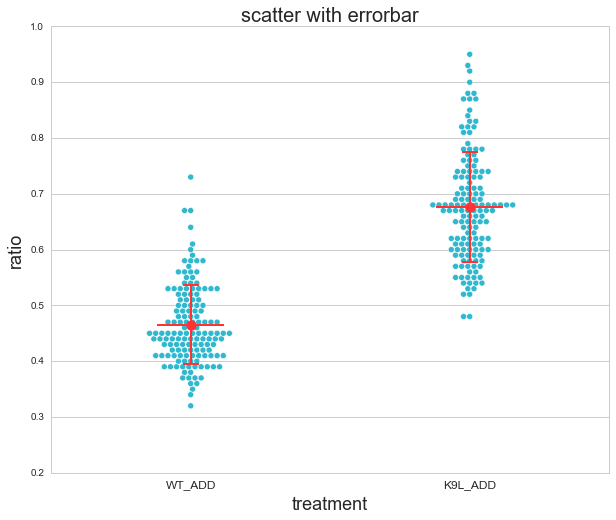

In [32]:
plt.figure(figsize=(10,8))
plt.title('scatter with errorbar', fontsize=20)
sns.swarmplot(x="treatment", y="ratio", data=data_mod, zorder=1, size=6,\
              color='#30b8cf', linewidth=0.5,edgecolor='white')
X = np.arange(len(sheets))
xerr = [0.12, 0.12]

linecolor = '#ff3333'
plt.errorbar(X, avg.values(), yerr = std.values(), linestyle='None', marker='o',\
             color=linecolor,markersize='10', ecolor=linecolor,capsize=8, zorder=2,linewidth=2,\
             capthick=2)
plt.errorbar(X, avg.values(), yerr = std.values(), linestyle='None', xerr = xerr,marker='o',\
             color=linecolor,markersize='10', ecolor=linecolor,capsize=5, zorder=2,linewidth=2,)
plt.xticks(X, sheets, fontsize=12)
plt.xlabel('treatment', fontsize=18)
plt.ylabel('ratio', fontsize=18)
pl.savefig('figure.png')
plt.show()

In [33]:
from scipy import stats

data1 = data_mod.loc[data_mod['treatment'] == sheets[0]]['ratio']
data2 = data_mod.loc[data_mod['treatment'] == sheets[1]]['ratio']

In [34]:
# This is a two-sided test for the null hypothesis that 2 independent 
# samples have identical average (expected) values. 
# This test assumes that the populations have identical variances by default.
stats.ttest_ind(a= data1, b= data2, equal_var=False)

Ttest_indResult(statistic=-20.93380438210292, pvalue=1.1164207427239034e-57)

In [35]:
avg

{u'K9L_ADD': 0.67638888888888882, u'WT_ADD': 0.46510489510489517}